In [ ]:
from google.colab import files
files=files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
import pandas as pd
# Define an empty list to store results
results_list = []

Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.89      0.88     22098
         Yes       0.57      0.51      0.54      6341

    accuracy                           0.80     28439
   macro avg       0.71      0.70      0.71     28439
weighted avg       0.80      0.80      0.80     28439

Confusion Matrix:
 [[19638  2460]
 [ 3123  3218]]


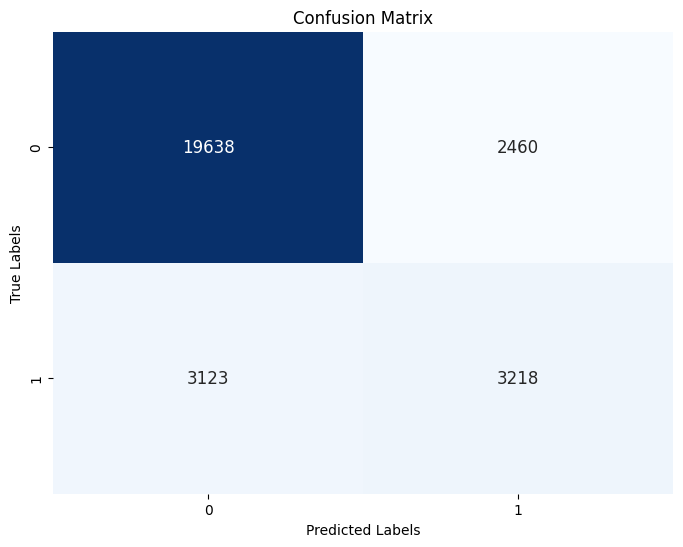

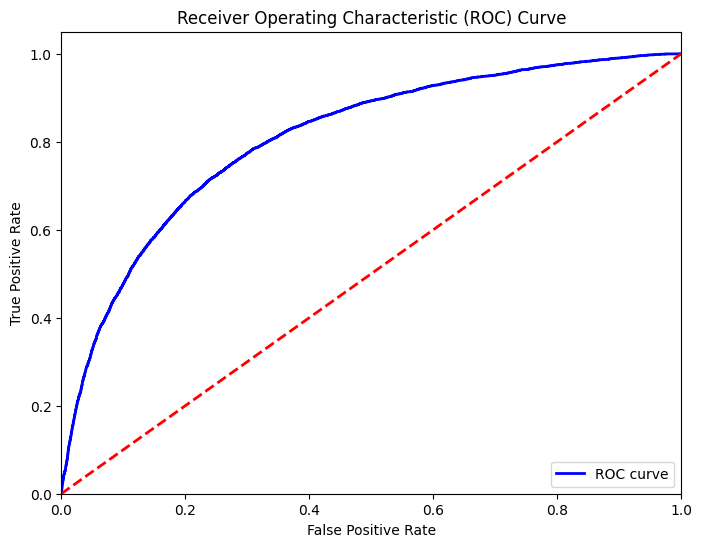

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.807435
1   Test Accuracy  0.803685
2        F1 Score  0.535485
3       Precision  0.566749
4          Recall  0.507491


In [ ]:
#ML
#Naive Bayes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gaussian Naive Bayes Classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate average of F1-score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a dictionary to store results for Naive Bayes
alg1_results = {
    'Algorithm': 'Naive Bayes',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)


# Now you can add this dictionary to your final results list or DataFrame
results_list.append(alg1_results)


Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.86      0.86     22098
         Yes       0.51      0.53      0.52      6341

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.79      0.78      0.78     28439

Confusion Matrix:
 [[18946  3152]
 [ 2995  3346]]


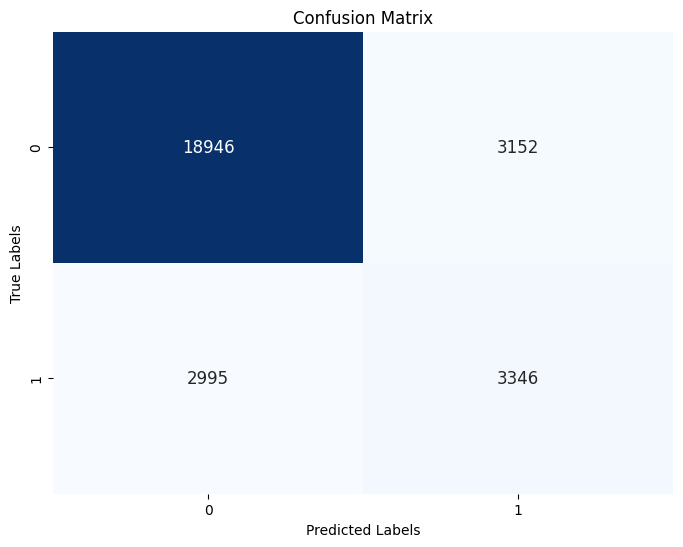

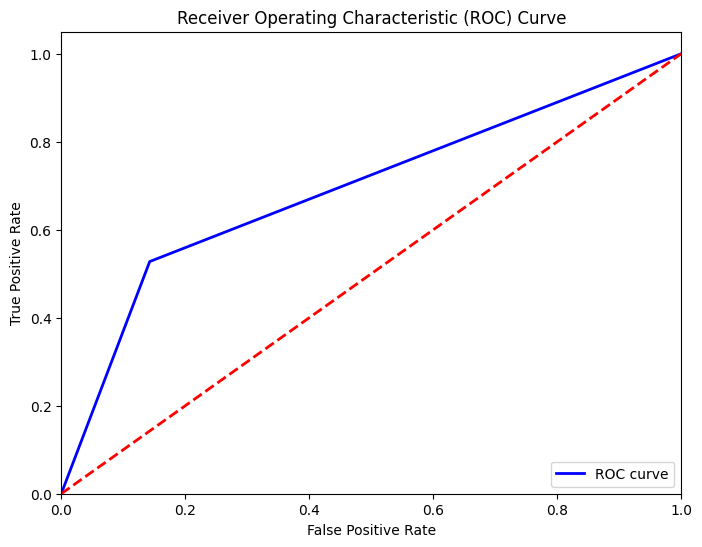

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  1.000000
1   Test Accuracy  0.783853
2        F1 Score  0.521224
3       Precision  0.514928
4          Recall  0.527677


In [ ]:
#Decision Tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import seaborn as sns

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate average of F1-score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a dictionary to store results for Decision Tree
alg2_results = {
    'Algorithm': 'Decision Tree',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)


# Now you can add this dictionary to your final results list or DataFrame
results_list.append(alg2_results)


Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.94      0.90     22098
         Yes       0.69      0.47      0.56      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.82      0.84      0.82     28439

Confusion Matrix:
 [[20765  1333]
 [ 3354  2987]]


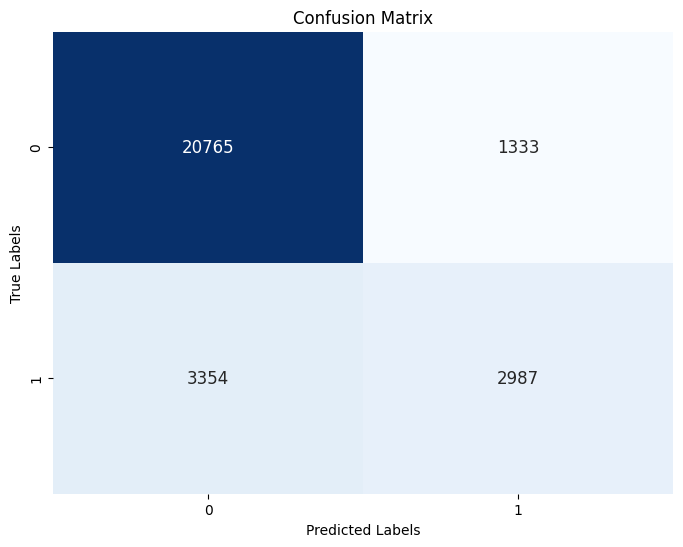

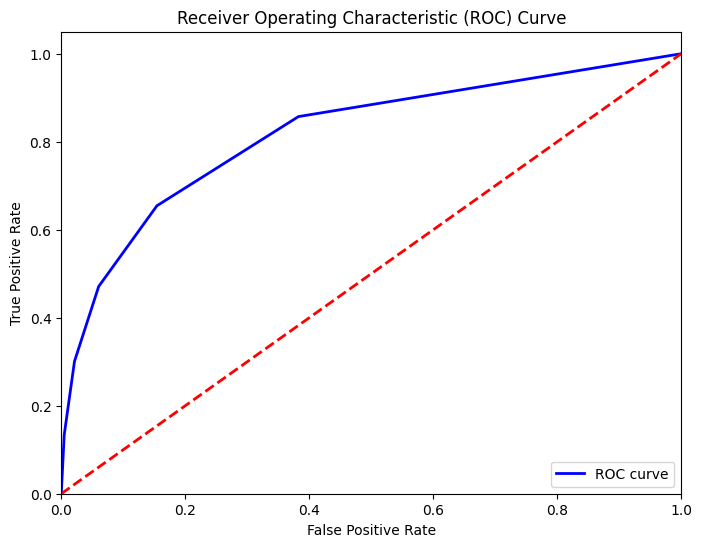

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.881129
1   Test Accuracy  0.835191
2        F1 Score  0.560360
3       Precision  0.691435
4          Recall  0.471061


In [ ]:
#KNN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import seaborn as sns

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN Classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = knn.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = knn.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
y_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate average of F1-score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a dictionary to store results for KNN
alg3_results = {
    'Algorithm': 'KNN',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)

# Assuming you have a list to store results called 'results_list'
results_list.append(alg3_results)


Training Accuracy: 0.8518255937610776
Testing Accuracy: 0.8550159517901453

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8799
           1       0.75      0.51      0.61      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.73      0.76     11284
weighted avg       0.85      0.86      0.84     11284


Confusion Matrix:
[[8372  427]
 [1209 1276]]


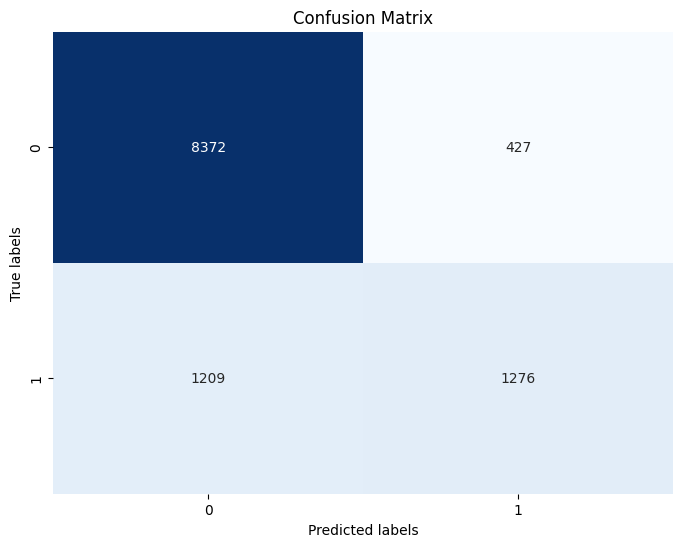


Evaluation Metrics:
Train Accuracy: 0.8518255937610776
Test Accuracy: 0.8550159517901453
F1 Score: 0.8445642165046057
Precision: 0.8463846542865952
Recall: 0.8550159517901453


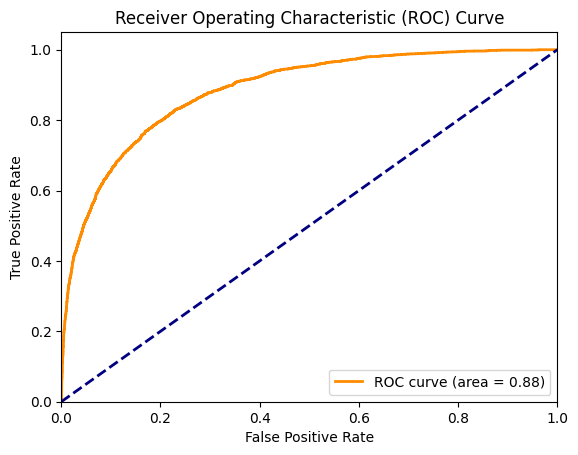


Updated Evaluation Metrics:
Train Accuracy: 0.8518255937610776
Test Accuracy: 0.8550159517901453
F1 Score: 0.8445642165046057
Precision: 0.8463846542865952
Recall: 0.8550159517901453
ROC AUC: 0.8838836862520733
Average: 0.8642239513783394


In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('weatherAUS.csv')

# Drop unnecessary columns
data.drop(['Date'], axis=1, inplace=True)  # Assuming 'Date' column is not relevant for prediction

# Handle NaN values
data.dropna(inplace=True)

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define features and target variable
X = data.drop(['RainTomorrow'], axis=1)  # Features
y = data['RainTomorrow']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier with a linear kernel (you can choose different kernels)
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = clf.predict(X_train)

# Predictions on the test set
y_test_pred = clf.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Evaluation Metrics
evaluation_metrics = {
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'F1 Score': classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['f1-score'],
    'Precision': classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['precision'],
    'Recall': classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['recall']
}

print("\nEvaluation Metrics:")
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score}")

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (evaluation_metrics['F1 Score'] + roc_auc) / 2

# Add average F1 score and ROC AUC to evaluation metrics
evaluation_metrics['ROC AUC'] = roc_auc
evaluation_metrics['Average'] = average_f1_roc_auc

# Update the dictionary with evaluation metrics
alg4_results = {
    'Algorithm': 'svm',
    'Test Accuracy': test_accuracy,
    'F1 Score': evaluation_metrics['F1 Score'],  # Use the F1 score from evaluation_metrics
    'Train Recall': evaluation_metrics['Recall'],  # Use the recall from evaluation_metrics
    'Train Precision': evaluation_metrics['Precision'],  # Use the precision from evaluation_metrics
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

print("\nUpdated Evaluation Metrics:")
for metric, score in evaluation_metrics.items():
    print(f"{metric}: {score}")


results_list.append(alg4_results)



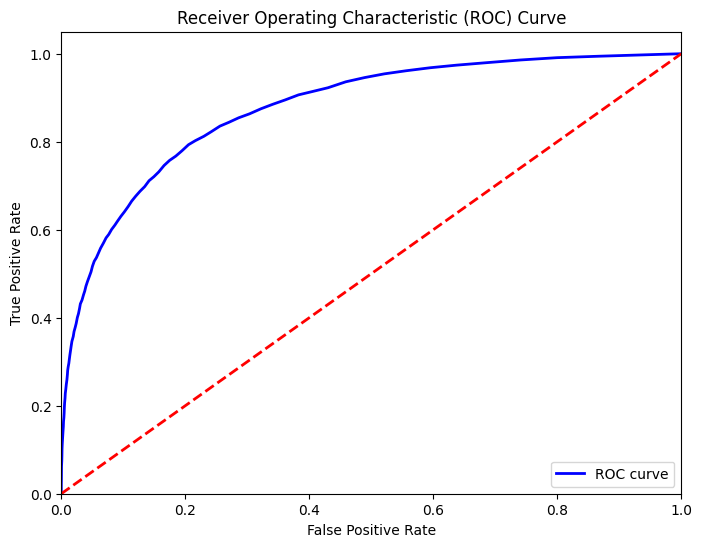

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     22098
         Yes       0.75      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

Confusion Matrix:
 [[21037  1061]
 [ 3142  3199]]


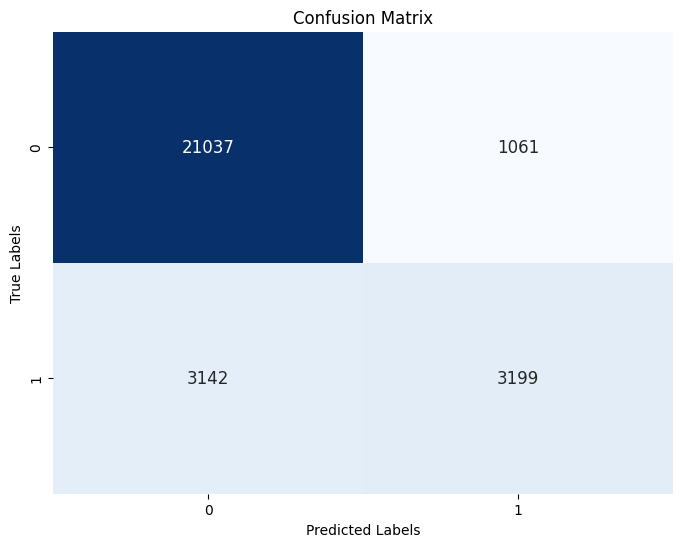

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.999947
1   Test Accuracy  0.852210
2        F1 Score  0.603528
3       Precision  0.750939
4          Recall  0.504495
5         ROC AUC  0.875591


In [ ]:
#Random Forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import seaborn as sns

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label='Yes')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate average of F1-score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall, roc_auc]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)


# Assuming these variables are defined earlier in your code:
# acc_test_nb, f1_score_test_nb, recall_score_train_nb, precision_score_train_nb

# Create a dictionary to store results for Random Forest
alg5_results = {
    'Algorithm': 'Random Forest',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg5_results)


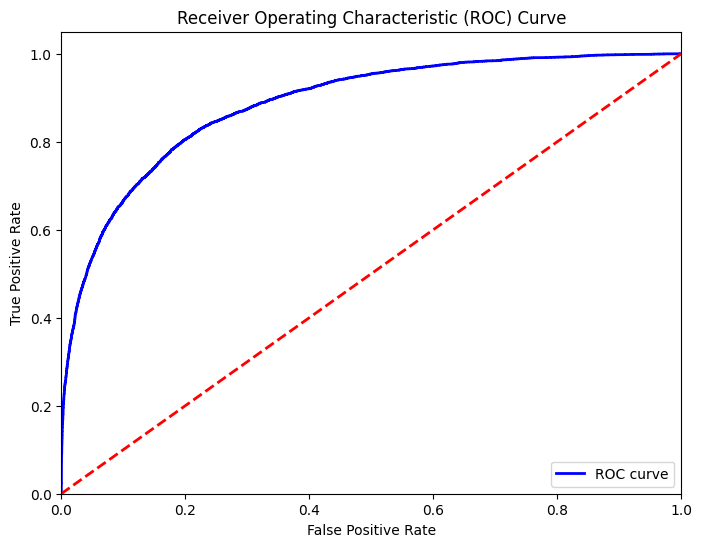

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22098
           1       0.74      0.55      0.63      6341

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Confusion Matrix:
 [[20902  1196]
 [ 2847  3494]]


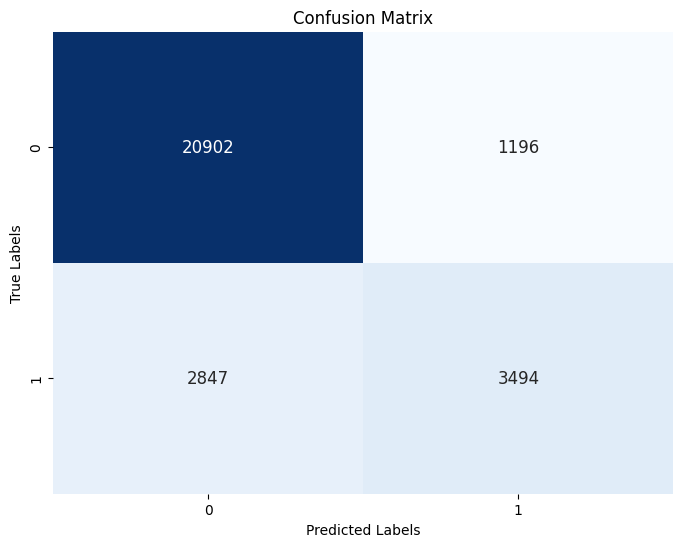

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.888997
1   Test Accuracy  0.857836
2        F1 Score  0.633487
3       Precision  0.744989
4          Recall  0.551017
5         ROC AUC  0.885284


In [ ]:
#XBoost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import seaborn as sns
import xgboost as xgb

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Encode target variable
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = xgb_clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
y_probs = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate average of F1-score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall, roc_auc]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)

# Create a dictionary to store results for XGBoost
alg6_results = {
    'Algorithm': 'XGBoost',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Append the results to the results list
results_list.append(alg6_results)


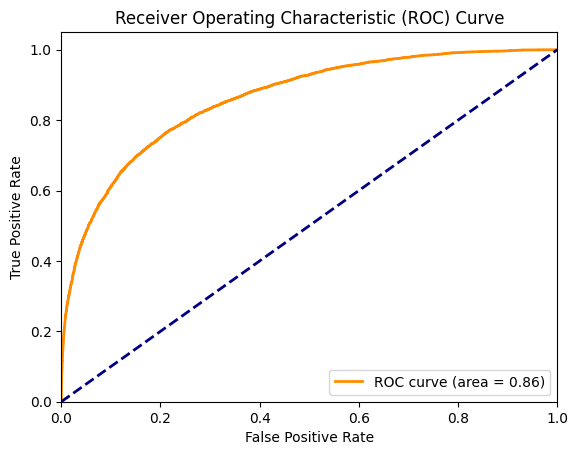

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     22098
         Yes       0.73      0.49      0.58      6341

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.74     28439
weighted avg       0.84      0.85      0.83     28439

Confusion Matrix:
 [[20974  1124]
 [ 3264  3077]]


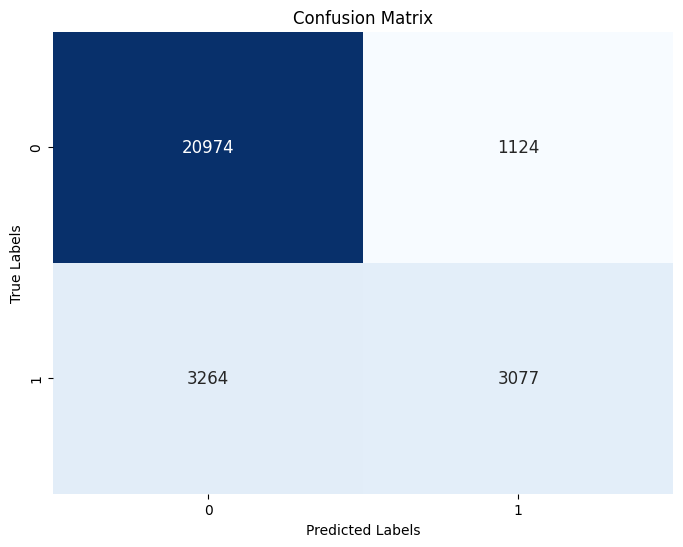

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.849421
1   Test Accuracy  0.845705
2        F1 Score  0.583760
3       Precision  0.732445
4          Recall  0.485255
5         ROC AUC  0.860129
6         Average  0.721945


In [ ]:
#GBM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import seaborn as sns

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier(random_state=42)
gbm_clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = gbm_clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = gbm_clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, pos_label='Yes')
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC area for positive class
y_prob = gbm_clf.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Average'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall, roc_auc, average_f1_roc_auc]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)

# Create a dictionary to store results for GBM
alg7_results = {
    'Algorithm': 'GBM',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg7_results)


In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.0 MB/s eta 0:00:00


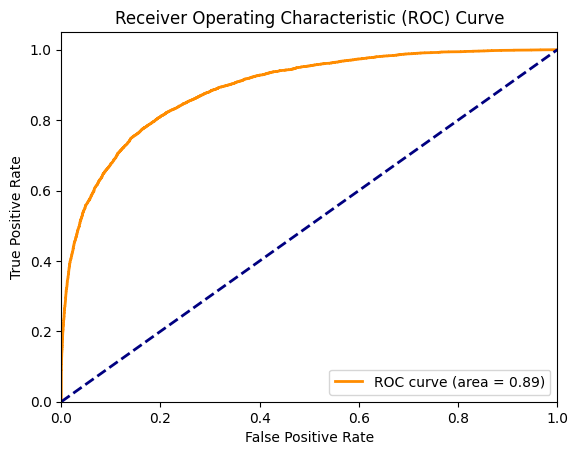

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     22098
           1       0.77      0.55      0.64      6341

    accuracy                           0.86     28439
   macro avg       0.82      0.75      0.78     28439
weighted avg       0.86      0.86      0.85     28439

Confusion Matrix:
 [[21042  1056]
 [ 2852  3489]]


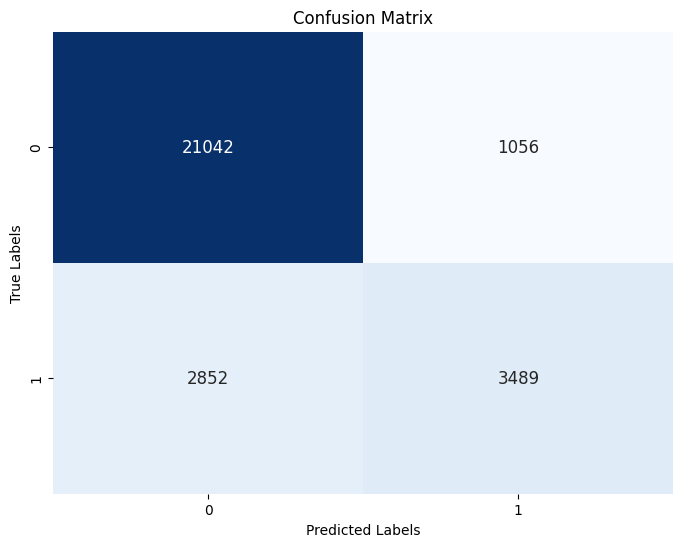

Evaluation Metrics:
            Metric     Score
0  Train Accuracy  0.886474
1   Test Accuracy  0.862583
2        F1 Score  0.641007
3       Precision  0.767657
4          Recall  0.550229
5         ROC AUC  0.889852
6         Average  0.765429


In [ ]:
#CatBoost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import seaborn as sns
from catboost import CatBoostClassifier

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Convert date column to numerical representation
preprocessed_data['Date'] = pd.to_datetime(preprocessed_data['Date']).astype(int) / 10**9

# One-hot encode categorical variables
preprocessed_data = pd.get_dummies(preprocessed_data)

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow_Yes', 'RainTomorrow_No'])  # Exclude encoded target columns
y = preprocessed_data['RainTomorrow_Yes']  # Use the encoded target column for 'Yes'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost Classifier
catboost_clf = CatBoostClassifier(random_state=42, verbose=False)
catboost_clf.fit(X_train, y_train)

# Make predictions on the train set
y_train_pred = catboost_clf.predict(X_train)
# Calculate train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test set
y_pred = catboost_clf.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC area for positive class
y_prob = catboost_clf.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Average'],
    'Score': [train_accuracy, test_accuracy, f1, precision, recall, roc_auc, average_f1_roc_auc]
})

# Print classification report
print("Classification Report:\n", class_report)

# Print confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics as a table
print("Evaluation Metrics:\n", metrics_df)

# Create a dictionary to store results for CatBoost
alg8_results = {
    'Algorithm': 'CatBoost',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'Train Recall': recall,
    'Train Precision': precision,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg8_results)


Epoch 1/20
3200/3200 [==============================] - 8s 2ms/step - loss: 0.5053 - accuracy: 0.7745 - val_loss: 0.4643 - val_accuracy: 0.7802
Epoch 2/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4684 - accuracy: 0.7750 - val_loss: 0.4367 - val_accuracy: 0.7802
Epoch 3/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4647 - accuracy: 0.7750 - val_loss: 0.4217 - val_accuracy: 0.7802
Epoch 4/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4510 - accuracy: 0.7754 - val_loss: 0.4222 - val_accuracy: 0.7802
Epoch 5/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4435 - accuracy: 0.7776 - val_loss: 0.4123 - val_accuracy: 0.8192
Epoch 6/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4415 - accuracy: 0.7777 - val_loss: 0.4123 - val_accuracy: 0.7802
Epoch 7/20
3200/3200 [==============================] - 6s 2ms/step - loss: 0.4390 - accuracy: 0.7836 - val_loss: 0.4229 - val_accuracy:

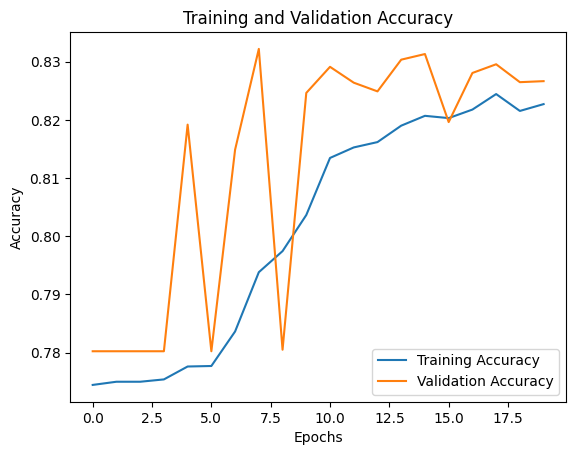

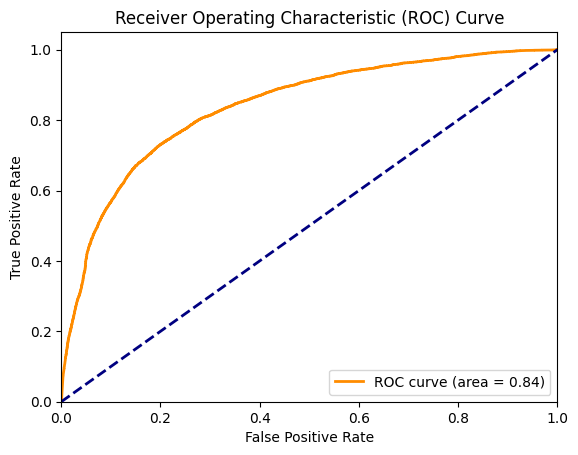

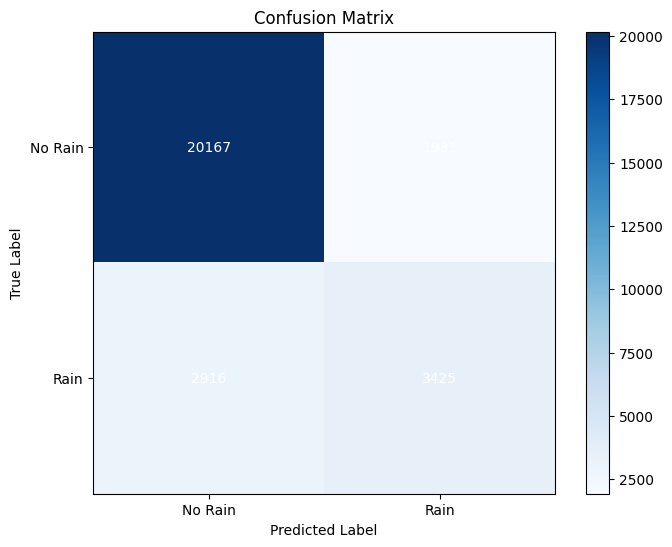

In [ ]:
#LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_cols:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Normalize numerical data
scaler = StandardScaler()
preprocessed_data[numerical_cols] = scaler.fit_transform(preprocessed_data[numerical_cols])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Reshape X for LSTM input
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate model
loss, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

# Create a dictionary to store results for LSTM
alg9_results = {
    'Algorithm': 'LSTM',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg9_results)


Epoch 1/20
3200/3200 [==============================] - 5s 1ms/step - loss: 2.4056 - accuracy: 0.7613 - val_loss: 0.5286 - val_accuracy: 0.7802
Epoch 2/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5376 - accuracy: 0.7749 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 3/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5347 - accuracy: 0.7750 - val_loss: 0.5266 - val_accuracy: 0.7802
Epoch 4/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5343 - accuracy: 0.7750 - val_loss: 0.5266 - val_accuracy: 0.7802
Epoch 5/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5333 - accuracy: 0.7750 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 6/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5343 - accuracy: 0.7750 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 7/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5338 - accuracy: 0.7750 - val_loss: 0.5266 - val_accuracy:

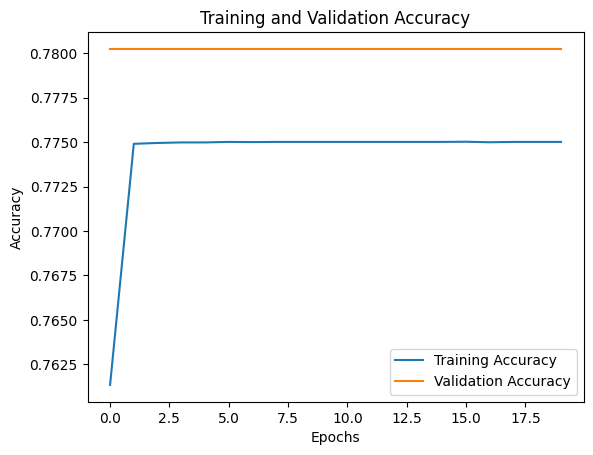

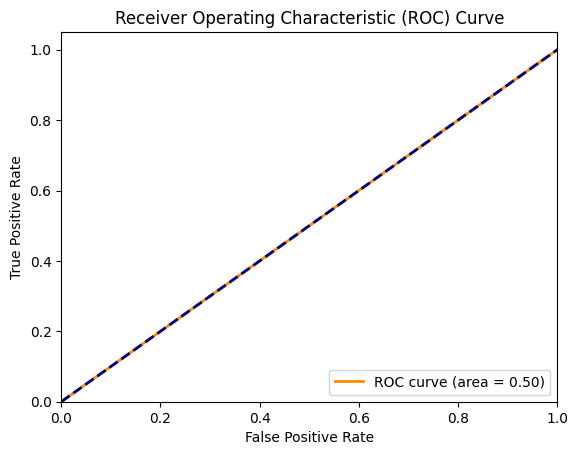

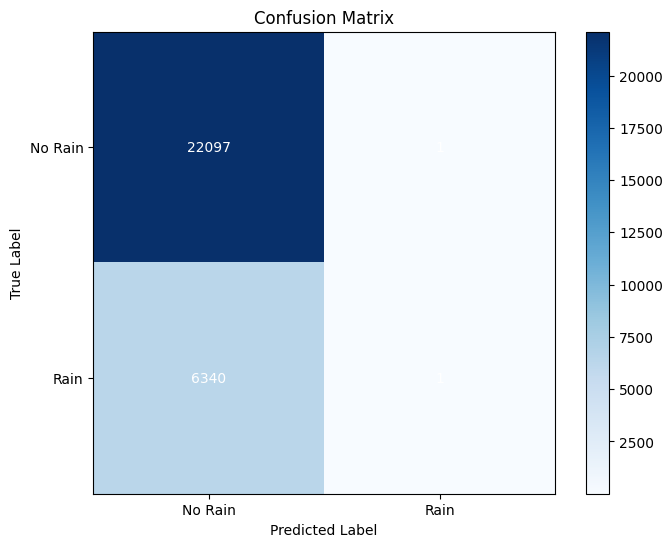

In [ ]:
#ANN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_cols:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Normalize numerical data
scaler = StandardScaler()
preprocessed_data[numerical_cols] = scaler.fit_transform(preprocessed_data[numerical_cols])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate model
loss, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

# Create a dictionary to store results for ANN
alg10_results = {
    'Algorithm': 'ANN',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg10_results)


Epoch 1/20
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5442 - accuracy: 0.7712 - val_loss: 0.4974 - val_accuracy: 0.7802
Epoch 2/20
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4674 - accuracy: 0.7869 - val_loss: 0.4765 - val_accuracy: 0.7803
Epoch 3/20
3200/3200 [==============================] - 5s 2ms/step - loss: 0.4557 - accuracy: 0.7919 - val_loss: 0.4310 - val_accuracy: 0.7803
Epoch 4/20
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4539 - accuracy: 0.7935 - val_loss: 0.4543 - val_accuracy: 0.7802
Epoch 5/20
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4525 - accuracy: 0.7953 - val_loss: 0.4646 - val_accuracy: 0.8184
Epoch 6/20
3200/3200 [==============================] - 5s 2ms/step - loss: 0.4502 - accuracy: 0.7934 - val_loss: 0.4260 - val_accuracy: 0.7803
Epoch 7/20
3200/3200 [==============================] - 5s 1ms/step - loss: 0.4523 - accuracy: 0.7928 - val_loss: 0.4265 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.87     22098
           1       0.00      0.00      0.00      6341

    accuracy                           0.78     28439
   macro avg       0.39      0.50      0.44     28439
weighted avg       0.60      0.78      0.68     28439



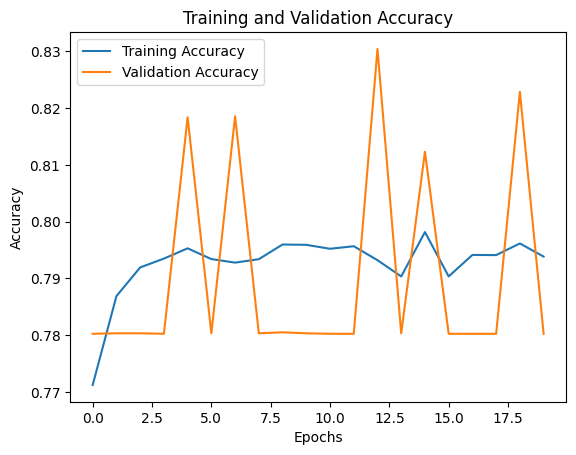

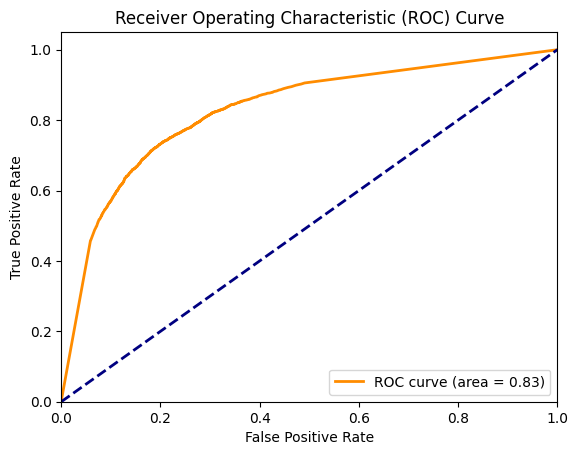

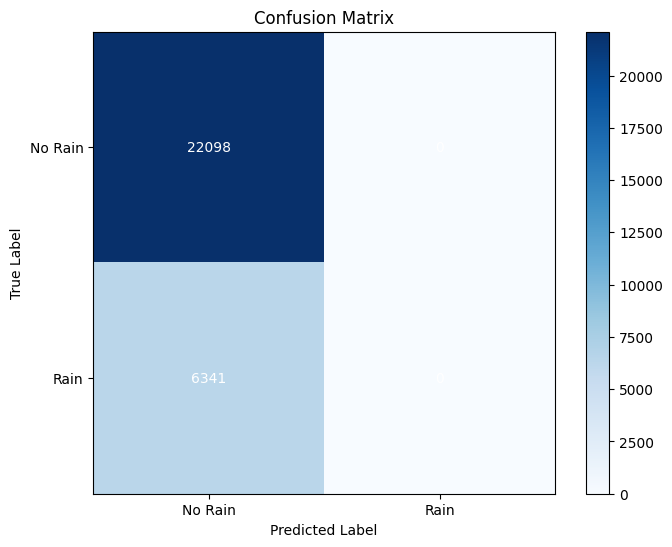

In [ ]:
#RNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_cols:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Normalize numerical data
scaler = StandardScaler()
preprocessed_data[numerical_cols] = scaler.fit_transform(preprocessed_data[numerical_cols])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Reshape X for RNN input
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate model
loss, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

# Create a dictionary to store results for RNN
alg11_results = {
    'Algorithm': 'RNN',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg11_results)


Epoch 1/20
3200/3200 [==============================] - 7s 2ms/step - loss: 2.1059 - accuracy: 0.7615 - val_loss: 0.5275 - val_accuracy: 0.7802
Epoch 2/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5360 - accuracy: 0.7749 - val_loss: 0.5266 - val_accuracy: 0.7802
Epoch 3/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5339 - accuracy: 0.7749 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 4/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5337 - accuracy: 0.7750 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 5/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5339 - accuracy: 0.7749 - val_loss: 0.5266 - val_accuracy: 0.7802
Epoch 6/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5346 - accuracy: 0.7750 - val_loss: 0.5267 - val_accuracy: 0.7802
Epoch 7/20
3200/3200 [==============================] - 4s 1ms/step - loss: 0.5332 - accuracy: 0.7750 - val_loss: 0.5267 - val_accuracy:

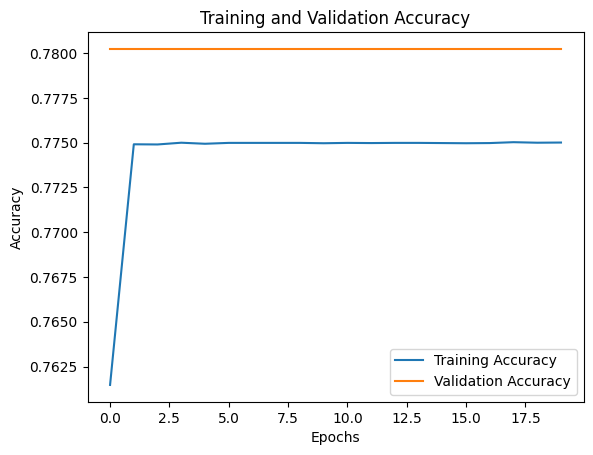

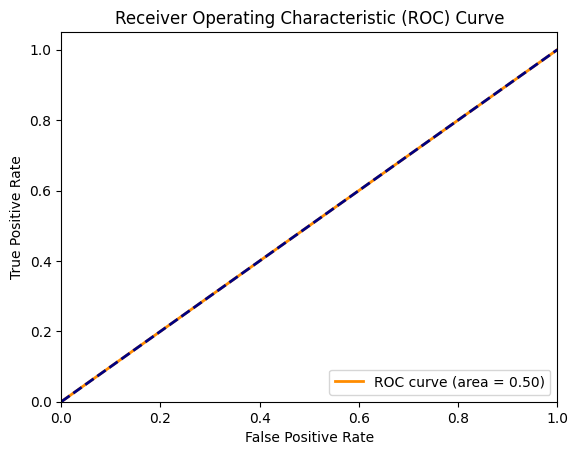

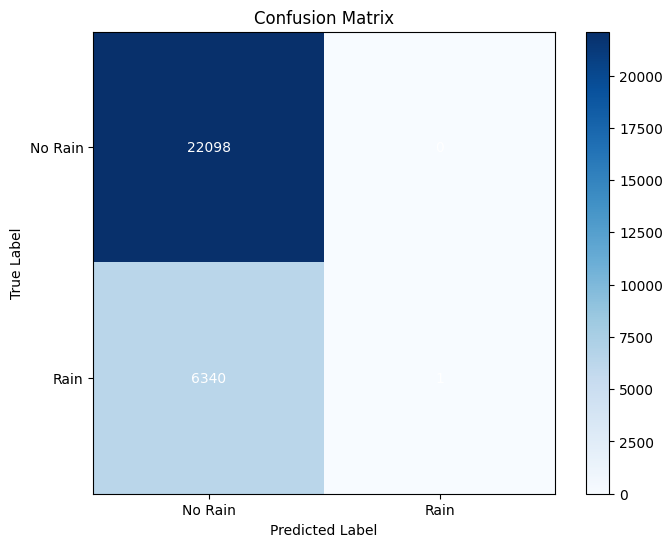

In [ ]:
#MLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Load the dataset
preprocessed_data = pd.read_csv('weatherAUS.csv')

# Drop rows with missing target values
preprocessed_data.dropna(subset=['RainTomorrow'], inplace=True)

# Drop columns with too many missing values
preprocessed_data.dropna(thresh=len(preprocessed_data) * 0.7, axis=1, inplace=True)

# Fill missing values in numerical columns with mean
numerical_cols = preprocessed_data.select_dtypes(include=['float64']).columns
preprocessed_data[numerical_cols] = preprocessed_data[numerical_cols].fillna(preprocessed_data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = preprocessed_data.select_dtypes(include=['object']).columns
preprocessed_data[categorical_cols] = preprocessed_data[categorical_cols].fillna(preprocessed_data[categorical_cols].mode().iloc[0])

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_cols:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Normalize numerical data
scaler = StandardScaler()
preprocessed_data[numerical_cols] = scaler.fit_transform(preprocessed_data[numerical_cols])

# Split features and target
X = preprocessed_data.drop(columns=['RainTomorrow'])
y = preprocessed_data['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build MLP model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate model
loss, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate average of F1 score and ROC AUC
average_f1_roc_auc = (f1 + roc_auc) / 2

# Print classification report
print(classification_report(y_test, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')
plt.show()

# Create a dictionary to store results for MLP
alg12_results = {
    'Algorithm': 'MLP',
    'Test Accuracy': test_accuracy,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'Average': average_f1_roc_auc
}

# Now you can add this dictionary to your final results list or DataFrame
# Assuming you have a list to store results called 'results_list'
results_list.append(alg12_results)


In [ ]:
# Convert results_list to DataFrame
results_df = pd.DataFrame(results_list)

In [ ]:
results_df

,Algorithm,Test Accuracy,F1 Score,Train Recall,Train Precision,ROC AUC,Average
0,Naive Bayes,0.803685,0.535485,0.507491,0.566749,0.807719,0.671602
1,Decision Tree,0.783853,0.521224,0.527677,0.514928,0.692520,0.606872
2,KNN,0.835191,0.560360,0.471061,0.691435,0.817725,0.689043
3,svm,0.855016,0.844564,0.855016,0.846385,0.883884,0.864224
4,Random Forest,0.852210,0.603528,0.504495,0.750939,0.875591,0.739560
5,XGBoost,0.857836,0.633487,0.551017,0.744989,0.885284,0.759386
6,GBM,0.845705,0.583760,0.485255,0.732445,0.860129,0.721945
7,CatBoost,0.862583,0.641007,0.550229,0.767657,0.889852,0.765429
8,LSTM,0.829565,0.585620,NaN,NaN,0.837726,0.711673
9,ANN,0.777032,0.000315,NaN,NaN,0.500045,0.250180
